<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_10_Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Modelos de Linguagem com N-gramas**
---

In [ ]:
#@title Baixando a versão 3.5 do NLTK

!pip3 install nltk==3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=97f33e8409d0bf4d82ba3da521a271ec331d4b69c5abfa8b87f9fd2b4075cc74
  Stored in directory: /root/.cache/pip/wheels/35/ab/82/f9667f6f884d272670a15382599a9c753a1dfdc83f7412e37d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
#@title Importando as dependências

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#@title Passo 01: carregando o córpus

texto = """No meio do caminho tinha uma pedra
Tinha uma pedra no meio do caminho
Tinha uma pedra
No meio do caminho tinha uma pedra"""

texto = texto.lower().split('\n')
texto

['no meio do caminho tinha uma pedra',
 'tinha uma pedra no meio do caminho',
 'tinha uma pedra',
 'no meio do caminho tinha uma pedra']

In [ ]:
#@title Passo 02: tokenizando as sentenças do córpus

texto_tokenizado = []
for verso in texto:
  tokens = nltk.word_tokenize(verso, language='portuguese')
  texto_tokenizado.append(tokens)

texto_tokenizado

[['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra'],
 ['tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho'],
 ['tinha', 'uma', 'pedra'],
 ['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra']]

**Pré-processando as Sentenças**

### Passo 03: Inserindo Marcadores de Início e Fim de Sentença

Suponha que queiramos definir um modelo de linguagem com bigramas, ou seja, calcular as chances de uma palavra com base na anterior (e.g., $P(pedra | uma)$, temos que marcar o início e fim da sentença para poder prever as changes da primeira palavra (e.g., $P(no | \langle s \rangle)$) e o fim da sentença ((e.g., $P(\langle/ s \rangle)$ | pedra)). Este processo é conhecido como *padding*.



Podemos fazer o *padding* de uma sentença utilizando o método **nltk.lm.preprocessing.pad_both_ends**:

In [ ]:
from nltk.lm.preprocessing import pad_both_ends

# definir o numero de n-gramas (no caso, 2 -> bigramas)
ngramas = 2

texto_tokenizado_pad = []
for verso in texto_tokenizado:
  padded = pad_both_ends(verso, n=ngramas)
  texto_tokenizado_pad.append(list(padded))

In [ ]:
texto_tokenizado_pad

[['<s>', 'no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', '</s>'],
 ['<s>', 'tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho', '</s>'],
 ['<s>', 'tinha', 'uma', 'pedra', '</s>'],
 ['<s>', 'no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', '</s>']]

Uma vez que as sentenças do nosso córpus foram pré-processadas, podemos calcular os n-gramas (neste caso, os bigramas), utilizando o método **nltk.ngrams**:

### Passo 04: Calculando os n-gramas

In [ ]:
ngramas = 2

bigramas_pad = []
for verso in texto_tokenizado_pad:
  bigramas = nltk.ngrams(verso, ngramas)
  bigramas_pad.append(list(bigramas))

In [ ]:
# bigramas [sentencas]
bigramas_pad

[[('<s>', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')],
 [('<s>', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', '</s>')],
 [('<s>', 'tinha'), ('tinha', 'uma'), ('uma', 'pedra'), ('pedra', '</s>')],
 [('<s>', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')]]

Contudo, para deixar nosso modelo de linguagem mais robusto, vamos calcular os **unigramas** além dos **bigramas** utilizando o comando **nltk.util.everygrams**:

In [ ]:
from nltk.util import everygrams
ngramas = 2

ngramas_pad = []
for verso in texto_tokenizado_pad:
  bigramas = everygrams(verso, max_len=ngramas)
  ngramas_pad.append(list(bigramas))

In [ ]:
ngramas_pad

[[('<s>',),
  ('no',),
  ('meio',),
  ('do',),
  ('caminho',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('</s>',),
  ('<s>', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')],
 [('<s>',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('no',),
  ('meio',),
  ('do',),
  ('caminho',),
  ('</s>',),
  ('<s>', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', '</s>')],
 [('<s>',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('</s>',),
  ('<s>', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')],
 [('<s>',),
  ('no',),
  ('meio',),
  ('do',),
  ('caminho',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('</s>',),
  ('<s>', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')]]

### Passo 05: Colocando todos os tokens do córpus numa única lista

>

**nltk.lm.preprocessing.flatten**:

>

Este método junta os elementos de sublistas em uma única lista. Por exemplo:

```python
>>> lista = [[1, 2], [3, 4]]
>>> flatten(lista)
[1, 2, 3, 4]
```



Como pode ser visto abaixo, nós utilizamos o método `flatten` para juntar todas os tokens das sentenças de nosso córpus numa única lista.

In [ ]:
from nltk.lm.preprocessing import flatten

# juntando as palavras do nosso corpus
tokens = list(flatten(texto_tokenizado_pad))

In [ ]:
tokens

['<s>',
 'no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra',
 '</s>',
 '<s>',
 'tinha',
 'uma',
 'pedra',
 'no',
 'meio',
 'do',
 'caminho',
 '</s>',
 '<s>',
 'tinha',
 'uma',
 'pedra',
 '</s>',
 '<s>',
 'no',
 'meio',
 'do',
 'caminho',
 'tinha',
 'uma',
 'pedra',
 '</s>']

### Passo 06: Definindo o Vocabulário

**nltk.lm.Vocabulary**

Utilizado para definir o vocabulário do nosso córpus. Recebe dois parâmetros como entrada: uma lista com todos os tokens do nosso córpus e a variável *unk_cutoff*, a qual passa a considerar palavras abaixo de um limiar de frequência como palavras fora do vocabuário.

In [ ]:
from nltk.lm import Vocabulary

# definir o vocabulario do nosso corpus
vocabulario = Vocabulary(tokens, unk_cutoff=1)

Obtendo as frequências das palavras do córpus com o comando *counts*:

In [ ]:
vocabulario.counts

Counter({'<s>': 4,
         'no': 3,
         'meio': 3,
         'do': 3,
         'caminho': 3,
         'tinha': 4,
         'uma': 4,
         'pedra': 4,
         '</s>': 4})

**Procurando uma palavra no vocabulário**

Caso a palavra não seja encontrada, o token de palavra fora do vocabulário será retornada (\<UNK>).

In [ ]:
vocabulario.lookup("tinha"), vocabulario.lookup("homem")

('tinha', '<UNK>')

**Simplificando o Pré-processamento**

Agora que você sabe cada passo do pré-processamento (inserir marcadores de início e fim de sentença, calcular os n-gramas, juntar todos os tokens do córpus numa lista e definir o vocabulário), este processo pode ser simplificado pela funcionalidade **nltk.lm.preprocessing.padded_everygram_pipeline**:

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline

ngramas = 2

ngramas_pad, vocabulario = padded_everygram_pipeline(ngramas, texto_tokenizado)

ngramas_pad = [list(w) for w in ngramas_pad]
ngramas_pad

[[('<s>',),
  ('no',),
  ('meio',),
  ('do',),
  ('caminho',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('</s>',),
  ('<s>', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')],
 [('<s>',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('no',),
  ('meio',),
  ('do',),
  ('caminho',),
  ('</s>',),
  ('<s>', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', '</s>')],
 [('<s>',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('</s>',),
  ('<s>', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')],
 [('<s>',),
  ('no',),
  ('meio',),
  ('do',),
  ('caminho',),
  ('tinha',),
  ('uma',),
  ('pedra',),
  ('</s>',),
  ('<s>', 'no'),
  ('no', 'meio'),
  ('meio', 'do'),
  ('do', 'caminho'),
  ('caminho', 'tinha'),
  ('tinha', 'uma'),
  ('uma', 'pedra'),
  ('pedra', '</s>')]]

### Passo 07: Treinando um modelo de linguagem

Um modelo de linguagem pode ser treinado utilizando a funcionalidade **nltk.lm.MLE**

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline, flatten
from nltk.lm import MLE

ngramas = 2
ngramas_pad, vocabulario = padded_everygram_pipeline(ngramas, texto_tokenizado)
lm = MLE(ngramas)
lm.fit(ngramas_pad, vocabulario)

Dado o token **\<s>**, gerando um texto de 4 tokens com o modelo de linguagem treinado.

In [ ]:
lm.generate(4, text_seed=["<s>"])

['no', 'meio', 'do', 'caminho']

Probabilidade da palavra *no*:

In [ ]:
print("Probabilidade comum: ", lm.score("no"))
print("Probabilidade logarítmica: ", lm.logscore("no"))

Probabilidade comum:  0.09375
Probabilidade logarítmica:  -3.415037499278844


Probabilidade da palavra *tinha* dado a palavra *caminho*:

In [ ]:
print("Probabilidade comum: ", lm.score("tinha", context=["caminho"]))
print("Probabilidade logarítmica: ", lm.logscore("tinha", context=["caminho"]))

Probabilidade comum:  0.6666666666666666
Probabilidade logarítmica:  -0.5849625007211563


## Avaliação Perplexidade

In [ ]:
teste = """Tinha uma pedra
No meio do caminho
Tinha uma pedra"""

# pre-processamento
teste = teste.lower().split('\n')
teste_tokenizado = []
for verso in teste:
  tokens = nltk.word_tokenize(verso, language='portuguese')
  teste_tokenizado.append(tokens)

In [ ]:
teste_tokenizado

[['tinha', 'uma', 'pedra'],
 ['no', 'meio', 'do', 'caminho'],
 ['tinha', 'uma', 'pedra']]

In [ ]:
ngramas = 1
teste_ngramas, _ = padded_everygram_pipeline(ngramas, teste_tokenizado)
teste_ngramas = flatten([list(w) for w in teste_ngramas])
print("Perplexidade do Unigrama: ", lm.perplexity(teste_ngramas))

Perplexidade do Unigrama:  8.975641163569597


In [ ]:
ngramas = 2
teste_ngramas, _ = padded_everygram_pipeline(ngramas, teste_tokenizado)
teste_ngramas = flatten([list(w) for w in teste_ngramas])
print("Perplexidade do Bigrama: ", lm.perplexity(teste_ngramas))

Perplexidade do Bigrama:  3.7299192471355798


**IMPORTANTE**:

> 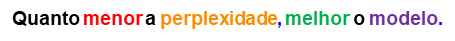

## **Generalização**

### Generalização: Add-1 Smoothing

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace

ngramas = 2
ngramas_pad, vocabulario = padded_everygram_pipeline(ngramas, texto_tokenizado)
lm = Laplace(ngramas)
lm.fit(ngramas_pad, vocabulario)

In [ ]:
round(lm.score("tinha", context=["caminho"]), 2)

0.23

### Generalização: Add-k Smoothing

In [ ]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Lidstone

ngramas = 2
k=0.1
ngramas_pad, vocabulario = padded_everygram_pipeline(ngramas, texto_tokenizado)
lm = Lidstone(order=ngramas, gamma=k)
lm.fit(ngramas_pad, vocabulario)

In [ ]:
round(lm.score("tinha", context=["caminho"]), 2)

0.53

**REFERÊNCIA**

---

Notebook adaptado a partir dos slides do curso online **Linguística Computacional** elaborado por discentes e docentes do Departamento de Ciência da Computação da UFMG, gentilmente cedido pelo professor **Thiago Castro Ferreira**.

Disponível a partir da **Aula 4: Modelos de Linguagem e N-gramas**

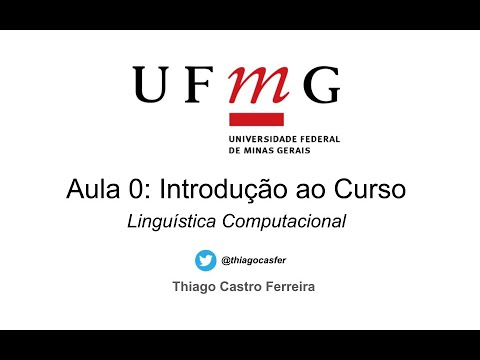

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('T4_J6Q2E4k0', width=550, height=310))

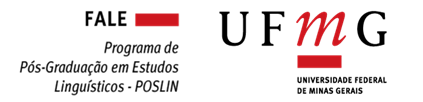